In [5]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from Label_Bot.label_bot import utils, models

In [2]:
train_scores_titles = np.load('train_scores_titles.npy')
train_scores_bodies = np.load('train_scores_bodies.npy')

train_labels = utils.make_st_compatible(pd.read_pickle('train_20k.pkl')).labels
train_labels = list(map(list, train_labels))


val_scores_titles = np.load('val_scores_titles.npy')
val_scores_bodies = np.load('val_scores_bodies.npy')

val_labels = utils.make_st_compatible(pd.read_pickle('val_20k.pkl')).labels
val_labels = list(map(list, val_labels))


test_scores_titles = np.load('test_scores_titles.npy')
test_scores_bodies = np.load('test_scores_bodies.npy')

test_labels = utils.make_st_compatible(pd.read_pickle('test_20k.pkl')).labels
test_labels = list(map(list, test_labels))

In [3]:
EPOCHS = 35

head = models.ScoresHead()
model_outputs, losses = head.fit(train_scores_titles, 
                                 train_scores_bodies, 
                                 train_labels, 
                                 val_titles=val_scores_titles, 
                                 val_bodies=val_scores_bodies, 
                                 val_labels=val_labels, 
                                 verbose=False, 
                                 epochs=EPOCHS)

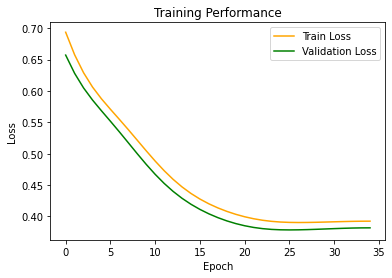

In [6]:
plt.figure()
plt.title('Training Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot([i for i in range(EPOCHS)], losses['train'], color='orange', label='Train Loss')
plt.plot([i for i in range(EPOCHS)], losses['val'], color='green', label='Validation Loss')
plt.legend(loc="upper right")
plt.show()

In [7]:
model_outputs = head.predict(test_scores_titles, test_scores_bodies)